In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
ratings=pd.read_csv('/drive/My Drive/recommened_system/ratings.csv')

In [4]:
movies=pd.read_csv('/drive/My Drive/recommened_system/movies.csv')

In [5]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [6]:
movies.shape

(9742, 3)

In [7]:
movies.head

<bound method NDFrame.head of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# rows are movie id
# col are user id
#  table is filled with ratings
#  this will let us know for each movie which all users rated and which didn't
# using pivot we are creating dataset
final_dataset=ratings.pivot(index='movieId', columns='userId', values='rating')
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remove NaN using fillna(0, inplace=True)
# inplace will reflect 0 in actual dataset(final_dataset)
final_dataset.fillna(0,inplace=True)

In [11]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# cleaning/ preprossing the data
# remove those user who haven't rated alot of movies
# remove those movies that doesn't have many numbers of users rated
# lets only consider those movie which are rated by greater 10 users

In [13]:
# for each movieid how many users have actually rated
no_of_user_rated_for_each_movie=ratings.groupby('movieId')['userId'].agg('count')

In [14]:
no_of_user_rated_for_each_movie

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

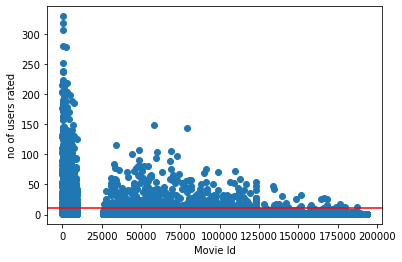

In [15]:
# lets plots movieid vs no of users rated each movieid
import matplotlib.pyplot as plt
# scatter(x,y) x= movieid y= no of users rated each movie
plt.scatter(no_of_user_rated_for_each_movie.index, no_of_user_rated_for_each_movie )
plt.xlabel('Movie Id')
plt.ylabel('no of users rated')
# create a horizontal line showing 10 users rated
plt.axhline(y=10, color='r')

In [16]:
# now remove movies which are below the line(which means they are rated less than 10 users)

In [17]:
no_of_user_rated_for_each_movie[no_of_user_rated_for_each_movie>10]

movieId
1         215
2         110
3          52
5          49
6         102
         ... 
174055     13
176371     18
177765     13
179819     12
187593     12
Name: userId, Length: 2121, dtype: int64

In [18]:
# only the rows that are rated more than 10 users -> only these rows need to be shown and all cols
no_of_user_rated_for_each_movie[no_of_user_rated_for_each_movie>10].index

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            159093, 164179, 166528, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2121)

In [19]:
final_dataset=final_dataset.loc[no_of_user_rated_for_each_movie[no_of_user_rated_for_each_movie>10].index, :]

In [20]:
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# remove the users who have rated<= 50 movies

In [22]:
# getting userid and number of movies each user rated
no_of_movie_rated_by_user=ratings.groupby('userId')['movieId'].agg('count')
no_of_movie_rated_by_user

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

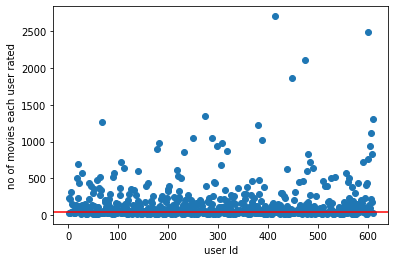

In [23]:
# lets plots userid vs no of rating each userid did
import matplotlib.pyplot as plt
# scatter(x,y) x= userid y= no of movies each user rated
plt.scatter(no_of_movie_rated_by_user.index, no_of_movie_rated_by_user)
plt.xlabel('user Id')
plt.ylabel('no of movies each user rated')
# create a horizontal line showing users rated 50 movies
plt.axhline(y=50, color='r')

In [24]:
# only these userid we need
no_of_movie_rated_by_user[no_of_movie_rated_by_user>50]

userId
1       232
4       216
6       314
7       152
10      140
       ... 
605     221
606    1115
607     187
608     831
610    1302
Name: movieId, Length: 378, dtype: int64

In [25]:
# only these userid col we need
no_of_movie_rated_by_user[no_of_movie_rated_by_user>50].index

Int64Index([  1,   4,   6,   7,  10,  11,  15,  16,  17,  18,
            ...
            600, 601, 602, 603, 604, 605, 606, 607, 608, 610],
           dtype='int64', name='userId', length=378)

In [26]:
final_dataset= final_dataset.loc[:,no_of_movie_rated_by_user[no_of_movie_rated_by_user>50].index]

In [27]:
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# we have more zero values and less non-zero values
# we will use csr_matrix to compress our dataset which will have only non-zero values
from scipy.sparse import csr_matrix

In [29]:
final_dataset.values

array([[4. , 0. , 0. , ..., 4. , 2.5, 5. ],
       [0. , 0. , 4. , ..., 0. , 2. , 0. ],
       [4. , 0. , 5. , ..., 0. , 2. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [30]:
# it is compressed and contains only non-zero values
csr_data= csr_matrix(final_dataset.values)

In [31]:
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# from multi index to single level database
final_dataset.reset_index(inplace=True)

In [33]:
final_dataset

userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
def get_recommened_movies(movie_name):
  # storing similar movie names in a list
  movie_list=movies[movies['title'].str.contains(movie_name)]
  # print(movie_list)
  if movie_list.empty != True:
    # get the movie index of the movie from the movie list
    movie_index= movie_list.iloc[0]['movieId'] 
    # grab the index too because in the crs everything is stored with index
    final_dataset[final_dataset['movieId']==movie_index].index[0]
    # nearestNeighbors is knn algothrim
    from sklearn.neighbors import NearestNeighbors
    # we are finding out neighbors with highest cosine and  required 20 of them
    knn= NearestNeighbors(metric='cosine', n_neighbors=20)
    # fitting means for each point it finds 20 neighbors
    knn.fit(csr_data)
    # providing index and no of nieghbors required 
    knn.kneighbors(csr_data[final_dataset[final_dataset['movieId']==movie_index].index[0]], n_neighbors=11)
    similarities,indices=knn.kneighbors(csr_data[final_dataset[final_dataset['movieId']==movie_index].index[0]], n_neighbors=11)
    # print(similarities)
    # two dimentional array
    # print(indices)
    # converting it into 1-D
    indices.squeeze().tolist()
    # we dont need 1821 for elminating 0 and we need in reverse(highest cosine is at bottom) with -1
    recd=sorted(list(zip(indices.squeeze().tolist(), similarities.squeeze().tolist())),key= lambda x:x[1])[:0:-1]
    # the very first movie recommeded movie
    # movies[movies['movieId']==final_dataset.iloc[1873]['movieId']]['title'].values[0]
    l=[]
    for val in recd:
      # finding its movie id in final_dataset
      movie_Id= final_dataset.iloc[val[0]]['movieId']
      # where the movie_id match we are printing its title
      l.append({'Movies':movies[movies['movieId']== movie_Id]['title'].values[0]})
    print(pd.DataFrame(l))
  else:
    print("cant recommened, no such movie in the dataset")
get_recommened_movies('Iron Man')

                           Movies
0                       Up (2009)
1  Guardians of the Galaxy (2014)
2                 Watchmen (2009)
3                Star Trek (2009)
4            Batman Begins (2005)
5                   Avatar (2009)
6               Iron Man 2 (2010)
7                   WALL·E (2008)
8         Dark Knight, The (2008)
9            Avengers, The (2012)


In [61]:
get_recommened_movies('Iron Man 2')

                                       Movies
0              Amazing Spider-Man, The (2012)
1                      Sherlock Holmes (2009)
2                              Ant-Man (2015)
3          Scott Pilgrim vs. the World (2010)
4  Captain America: The Winter Soldier (2014)
5              Guardians of the Galaxy (2014)
6                           Iron Man 3 (2013)
7                             Iron Man (2008)
8                        Avengers, The (2012)
9                   X-Men: First Class (2011)


In [62]:
get_recommened_movies('Toy Story')

                                              Movies
0                               Groundhog Day (1993)
1                              Lion King, The (1994)
2                                Pulp Fiction (1994)
3  Star Wars: Episode VI - Return of the Jedi (1983)
4                                   Apollo 13 (1995)
5                                       Shrek (2001)
6          Star Wars: Episode IV - A New Hope (1977)
7                                 Toy Story 2 (1999)
8                                Forrest Gump (1994)
9                               Jurassic Park (1993)


In [63]:
get_recommened_movies('Jurassic Park')

                                 Movies
0                      Toy Story (1995)
1                        Aladdin (1992)
2                         Batman (1989)
3            Mission: Impossible (1996)
4                  Fugitive, The (1993)
5                          Speed (1994)
6                     Braveheart (1995)
7                   Forrest Gump (1994)
8  Independence Day (a.k.a. ID4) (1996)
9     Terminator 2: Judgment Day (1991)


In [56]:
get_recommened_movies('Speed')

183
                              Movies
0         Mission: Impossible (1996)
1                      Batman (1989)
2                Forrest Gump (1994)
3              Mrs. Doubtfire (1993)
4                  Braveheart (1995)
5  Die Hard: With a Vengeance (1995)
6  Terminator 2: Judgment Day (1991)
7               Fugitive, The (1993)
8               Jurassic Park (1993)
9                   True Lies (1994)
